In [1]:
# import logging
import os
import re
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import torch
import yaml
from einops import rearrange

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from mushroom.mushroom import Mushroom
import mushroom.utils as utils

/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packag

In [5]:
run_dir = '/data/estorrs/mushroom/data/projects/subclone'
mushroom_dir = os.path.join(run_dir, 'mushroom')
config_fps = sorted(utils.listfiles(mushroom_dir, regex=r'/config.yaml'))
config_fps

['/data/estorrs/mushroom/data/projects/subclone/mushroom/HT112C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT206B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT225C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT226C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT235B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT243B1-H3/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT243B1-H4/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT268B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT271B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT339B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT413C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclon

In [6]:
visium_config = {
    'dtype': 'visium',
#     'sections': config,
    'chkpt_filepath': None,
    'sae_kwargs': {
        'size': 512,
        'patch_size': 32,
        'kl_scaler': .0001,
        'recon_scaler': 1.,
        'codebook_size': 50,
        'encoder_dim': 256,
        'decoder_dims': (256, 1000, 5000,)
    },
    'learner_kwargs': {
        'scale': .1,
        'pct_expression': .02,
        'batch_size': 64,
        'num_workers': 1,
        'device': 'cpu',
#         'channels': channels,
#         'channel_mapping': channel_mapping
    },
    'train_kwargs': {
        'num_iters': 10000,
        'lr': 1e-4,
        'log_every': 10,
        'save_every': 500,
#         'save_dir': chkpt_dir       
    },
    'cluster_kwargs': {
        'num_clusters': 20,
        'mask_background': True,
        'margin': .05,
        'background_channels': None,
        'span_all_sections': True,
        'centroids': None,
    }
}

In [7]:
config_fp = '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml'

case = config_fp.split('/')[-2]
out_dir = os.path.join(f'/data/estorrs/mushroom/data/projects/testing/mushroom/{case}_vae_vq_visium_cb20/outputs')

config = yaml.safe_load(open(config_fp))

chkpt_dir = os.path.join(out_dir, 'chkpts')
Path(chkpt_dir).mkdir(parents=True, exist_ok=True)

In [8]:
'/data/estorrs/mushroom/data/projects/testing/mushroom/HT397B1_vae_vq_visium_cb20/outputs/chkpts/8000iter.pt'

'/data/estorrs/mushroom/data/projects/testing/mushroom/HT397B1_vae_vq_visium_cb20/outputs/chkpts/8000iter.pt'

In [9]:
visium_config['sections'] = config
visium_config['train_kwargs']['save_dir'] = chkpt_dir
visium_config['chkpt_filepath'] = os.path.join(chkpt_dir, '8000iter.pt')

In [10]:
mushroom = Mushroom.from_config(visium_config)

INFO:root:using device: cpu
INFO:root:generating inputs for visium tissue sections
INFO:root:using 11622 channels
INFO:root:2 sections detected: ['s0', 's3']
INFO:root:processing sections
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:learner initialized
INFO:root:initializing clusterer
INFO:root:no background channel detected, defaulting to mean of all channels


In [11]:
mushroom.embed_sections()

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

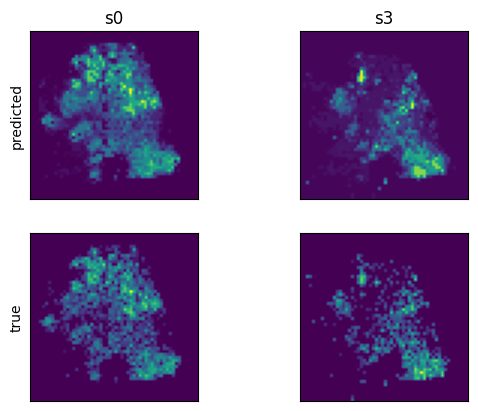

In [12]:
mushroom.display_predicted_pixels(channel='EPCAM')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

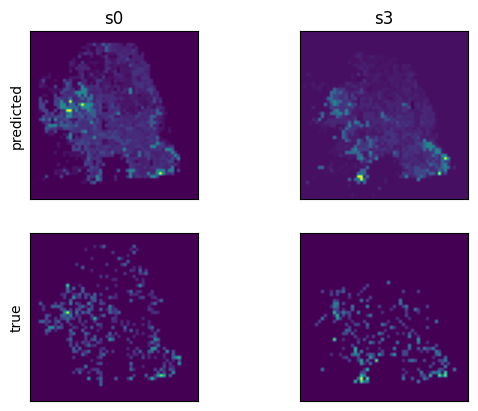

In [13]:
mushroom.display_predicted_pixels(channel='IL7R')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

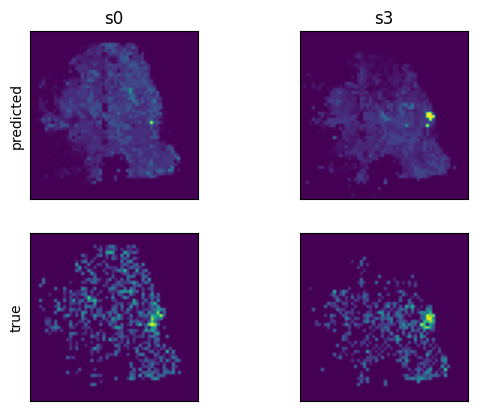

In [14]:
mushroom.display_predicted_pixels(channel='CD68')

In [15]:
ds = mushroom.learner.inference_ds

imgs = []
for idx in range(len(ds)):
    section_idx, row_idx, col_idx = ds.idx_to_coord[idx]
    section = ds.sections[section_idx]
    img = ds.section_to_tiles[section][row_idx, col_idx]
    imgs.append(img)
imgs = torch.stack(imgs)

recon_labeled = torch.stack(
    [ds.section_from_tiles(
        imgs, i,
#         size=(mushroom.learner.train_transform.output_size[0], mushroom.learner.train_transform.output_size[1])
    ) for i in range(len(ds.sections))]
)

In [16]:
recon_labeled.shape

torch.Size([2, 1, 1792, 1792])

In [17]:
mushroom.recon_embs.shape

torch.Size([2, 256, 56, 56])

In [18]:
mushroom.learner.sae.vq.codebook.shape

torch.Size([100, 256])

In [19]:
with torch.no_grad():
    h, w = mushroom.recon_embs.shape[-2], mushroom.recon_embs.shape[-1]
    _, indices, _ = mushroom.learner.sae.vq(
        rearrange(mushroom.recon_embs.to(mushroom.learner.device), 'n d h w -> n (h w) d'))
    indices = rearrange(indices, 'n (h w) -> n h w', h=h, w=w).detach().cpu().numpy()

In [20]:
indices.shape

(2, 56, 56)

In [21]:
def relabel(labels):
    new = np.zeros_like(labels, dtype=labels.dtype)
    ids = np.unique(labels)
    for i in range(len(ids)):
        new[labels==ids[i]] = i
        
    return new

cluster_ids = relabel(indices)
cluster_ids.shape

(2, 56, 56)

In [22]:
np.unique(cluster_ids)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [23]:
import torchvision.transforms.functional as TF
patch_size = 32
resized_cluster_ids = TF.resize(
    torch.tensor(cluster_ids),
    (recon_labeled.shape[-2], recon_labeled.shape[-1]),
    antialias=False,
    interpolation=TF.InterpolationMode.NEAREST
).numpy()
resized_cluster_ids.shape

(2, 1792, 1792)

In [24]:
from skimage.measure import regionprops

for section_idx in range(len(ds.sections)):
    section = ds.sections[section_idx]
    a = ds.section_to_adata[section]
    labeled = recon_labeled[section_idx]

    props = regionprops(labeled.to(torch.int32).numpy())
    a.obsm['spatial_scaled'] = np.zeros_like(a.obsm['spatial'])
    for prop in props:
        _, r, c = prop.centroid
        a.obsm['spatial_scaled'][prop.label - 1] = [c, r]
        
    ds.section_to_adata[section] = a

In [25]:
for section_idx in range(len(ds.sections)):
    section = ds.sections[section_idx]
    a = ds.section_to_adata[section]
    
    a.obs['cluster'] = [str(resized_cluster_ids[section_idx, r, c]) for c, r in a.obsm['spatial_scaled']]
    ds.section_to_adata[section] = a

... storing 'cluster' as categorical


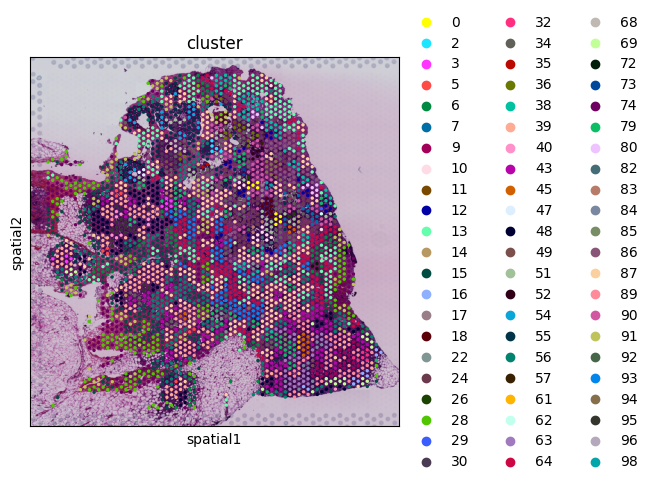

In [26]:
a = ds.section_to_adata['s0']
sc.pl.spatial(a, color=['cluster'])

In [28]:
exp = []
ids = np.unique(cluster_ids)
for i in ids:
    mask = cluster_ids == int(i)
#     x = rearrange(mushroom.recon_imgs, 'n d h w -> d n h w')
    x = rearrange(mushroom.true_imgs, 'n d h w -> d n h w')
    exp.append(x[:, mask].mean(-1))

    
exp = torch.stack(exp)
exp = pd.DataFrame(data=exp.numpy(), columns=mushroom.learner.channels, index=ids)
exp = exp[~pd.isnull(exp.iloc[:, 0])]
exp


,A1BG,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMDC,AAMP,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
0,0.211873,0.563777,0.502681,0.437715,0.475262,0.066040,0.292879,0.293216,0.218992,0.442040,...,0.078866,0.228885,0.293216,0.294881,0.145070,0.378373,0.104167,0.150942,0.633674,0.429737
1,0.071779,0.345573,0.285345,0.505439,0.190777,0.063093,0.241830,0.038685,0.150000,0.413200,...,0.000000,0.079248,0.183333,0.000000,0.150000,0.209734,0.000000,0.183108,0.516579,0.243524
2,0.166667,0.444138,0.575539,0.430722,0.256397,0.000000,0.278658,0.299315,0.118736,0.535901,...,0.000000,0.329106,0.215338,0.196015,0.102191,0.444775,0.250000,0.247560,0.608111,0.491044
3,0.183333,0.386464,0.388175,0.436496,0.396033,0.000000,0.167636,0.172271,0.164019,0.442378,...,0.000000,0.057424,0.086135,0.344577,0.025790,0.326639,0.116667,0.035621,0.462216,0.215436
4,0.009901,0.234655,0.054961,0.074180,0.029374,0.007252,0.041188,0.033909,0.024109,0.121816,...,0.009669,0.024904,0.035206,0.032245,0.024109,0.079382,0.006043,0.028877,0.214074,0.060514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.166667,0.518380,0.233580,0.260138,0.290545,0.083333,0.241846,0.074219,0.083115,0.407363,...,0.000000,0.183108,0.100491,0.060206,0.090266,0.277127,0.000000,0.103952,0.540022,0.303541
95,0.076416,0.277960,0.279916,0.220853,0.244618,0.016667,0.223599,0.173490,0.099470,0.342985,...,0.021031,0.191505,0.064601,0.172764,0.070923,0.134645,0.100000,0.159847,0.481715,0.261959
96,0.005037,0.186978,0.022484,0.036581,0.020567,0.005534,0.019475,0.024320,0.018275,0.079650,...,0.006457,0.013889,0.023336,0.008862,0.024247,0.046727,0.011991,0.015741,0.158548,0.039166
97,0.006083,0.032279,0.027530,0.016756,0.002825,0.001782,0.006591,0.005464,0.004708,0.010397,...,0.001782,0.002825,0.002354,0.008742,0.008945,0.009533,0.001188,0.002433,0.030714,0.010733


In [29]:
def plot_change(clusters, column='cluster', alpha_img=.5, size=2., figsize=(5, 5)):
    if isinstance(clusters, str):
        clusters = [clusters]
    fig, axs = plt.subplots(ncols=len(ds.sections), nrows=len(clusters), figsize=figsize)
    for i, section in enumerate(ds.sections):
        for j, cluster in enumerate(clusters):
            a = ds.section_to_adata[section]
            ax = axs[j, i] if len(clusters) > 1 else axs[i]

            a.obs['highlight'] = ['yes' if c==cluster else 'no' for c in a.obs[column]]
            a.obs['highlight'] = a.obs['highlight'].astype('category')
            d = next(iter(a.uns['spatial'].values()))
            scale = d['scalefactors']['tissue_hires_scalef']
            h, w = int(d['images']['hires'].shape[0] / scale), int(d['images']['hires'].shape[1] / scale)
            sc.pl.spatial(a, color=['highlight'], ax=ax, show=False, alpha_img=alpha_img, legend_loc=None,
                         size=size, crop_coord=(0, w, 0, h))
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title('')
            
            if j == 0:
                ax.set_title(section)
            
            if i == 0:
                ax.set_ylabel(cluster)
        
def plot_change_vars(vars, colorbar_loc=None, alpha_img=.5, size=2., figsize=(5, 5)):
    if isinstance(vars, str):
        vars = [vars]
    fig, axs = plt.subplots(ncols=len(ds.sections), nrows=len(vars), figsize=figsize)
    for i, section in enumerate(ds.sections):
        for j, var in enumerate(vars):
            a = ds.section_to_adata[section]
            ax = axs[j, i] if len(vars) > 1 else axs[i]
            d = next(iter(a.uns['spatial'].values()))
            scale = d['scalefactors']['tissue_hires_scalef']
            h, w = int(d['images']['hires'].shape[0] / scale), int(d['images']['hires'].shape[1] / scale)
            sc.pl.spatial(a, color=[var], ax=ax, show=False, alpha_img=alpha_img,
                          legend_loc=None, colorbar_loc=colorbar_loc, crop_coord=(0, w, 0, h),
                         size=size)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title('')
            
            if j == 0:
                ax.set_title(section)
            
            if i == 0:
                ax.set_ylabel(var)

In [30]:
from mushroom.visualization.utils import display_labeled_as_rgb

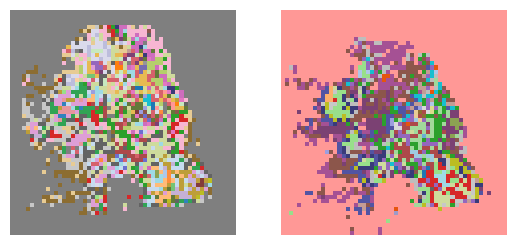

In [32]:
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c') + sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c')
fig, axs = plt.subplots(ncols=len(ds.sections))
for ax, x in zip(axs, cluster_ids):
    x = display_labeled_as_rgb(x, cmap=cmap)
    ax.imshow(x)
    ax.axis('off')

In [33]:
np.unique(cluster_ids, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 array([   4,    5,    3,    5,   87,   59,   38,    6,   57,   12,    6,
          14,   11,  106,    4,  100,    4,    2,    4,    8,   53,   20,
           5,    4,   28,    7,    2,   22,  103,    1,    6,    3,    3,
          42,   42,    1,    7,    1,   35,   64,    5,    1,    8,   52,
           7,    5,    6,    1,   46,    4,   52,   18,    3,    1,   15,
          53,  110,    1,   78,    5,    4,    2,    1,   17,   54,    4,
          42, 1926,    4,   12,  175,    5,    1,    1, 1719,   20,   31,
           2,   24,   40,    6,   60

In [40]:

from sklearn.cluster import AgglomerativeClustering
dist = 5.
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=dist).fit(exp.values)
# clustering = AgglomerativeClustering(n_clusters=10, distance_threshold=None).fit(exp.values)
cluster_to_label = {c:l for c, l in zip(exp.index, clustering.labels_)}
neigh_ids = np.vectorize(cluster_to_label.get)(cluster_ids)
len(np.unique(neigh_ids))

76

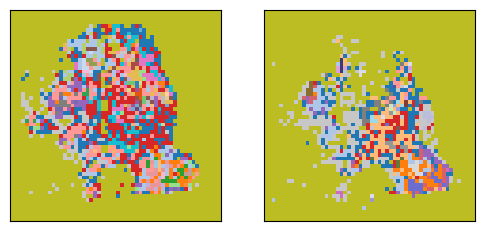

In [41]:
fig, axs = plt.subplots(ncols=neigh_ids.shape[0], figsize=(6, 4))
for i, labeled in enumerate(neigh_ids):
    axs[i].imshow(display_labeled_as_rgb(labeled, cmap=cmap))
    axs[i].set_xticks([])
    axs[i].set_yticks([])

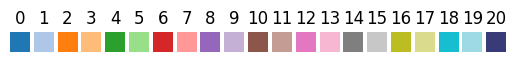

In [37]:
labels = np.unique(neigh_ids)
fig, axs = plt.subplots(ncols=len(labels))
for n, l in enumerate(labels):
    axs[n].imshow(rearrange(np.asarray(cmap[l]), 'n -> 1 1 n'))
    axs[n].axis('off')
    axs[n].set_title(str(l))
    

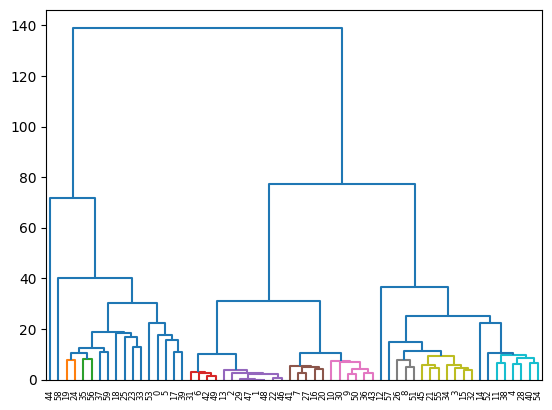

In [150]:
import scipy.cluster.hierarchy as shc
links = shc.linkage(exp.values, method ='ward')
dendrogram = shc.dendrogram((links), color_threshold=dist, labels=exp.index.to_list())